In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [50]:
df_train = pd.read_csv("./FIFA_train.csv")
df_test = pd.read_csv("./FIFA_test.csv")
df_train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


## 데이터 전처리

### 남은 계약 기간

In [51]:
def contract_clean(in_str):
    if len(in_str) > 5:
        mon_str, year = in_str.split(", ")
        month, day = mon_str.split()
        year = int(year)
        if month == 'Jan':
            mon = 1 / 12
            year += mon
        elif month == "May":
            mon = 5 / 12
            year += mon
        elif month == "Jun":
            mon = 6 / 12
            year += mon
        elif month == "Dec":
            mon = 12 / 12
            year += mon
        return year
    else:
        year = int(in_str[-4:])
        return year

df_train['contract_until'] = df_train['contract_until'].apply(contract_clean)
df_test['contract_until'] = df_test['contract_until'].apply(contract_clean)       

In [52]:
df_train['contract_until'].unique()

array([2021.        , 2020.        , 2019.        , 2023.        ,
       2022.        , 2024.        , 2019.5       , 2026.        ,
       2018.        , 2025.        , 2020.5       , 2020.41666667,
       2019.41666667, 2019.08333333])

In [53]:
df_train['contract'] = 2018
df_test['contract'] = 2018
df_train.contract_until -= df_train.contract
df_test.contract_until -= df_test.contract 
df_train.drop('contract', axis = 1, inplace = True)
df_test.drop('contract', axis = 1, inplace = True)
df_train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,3.0,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2.0,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,3.0,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2.0,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,3.0,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,1.0,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2.0,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,3.0,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,3.0,GK,right,1.0,47,65,1.0,50000.0


### value값 log

C:\Users\choo1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='value', ylabel='Density'>

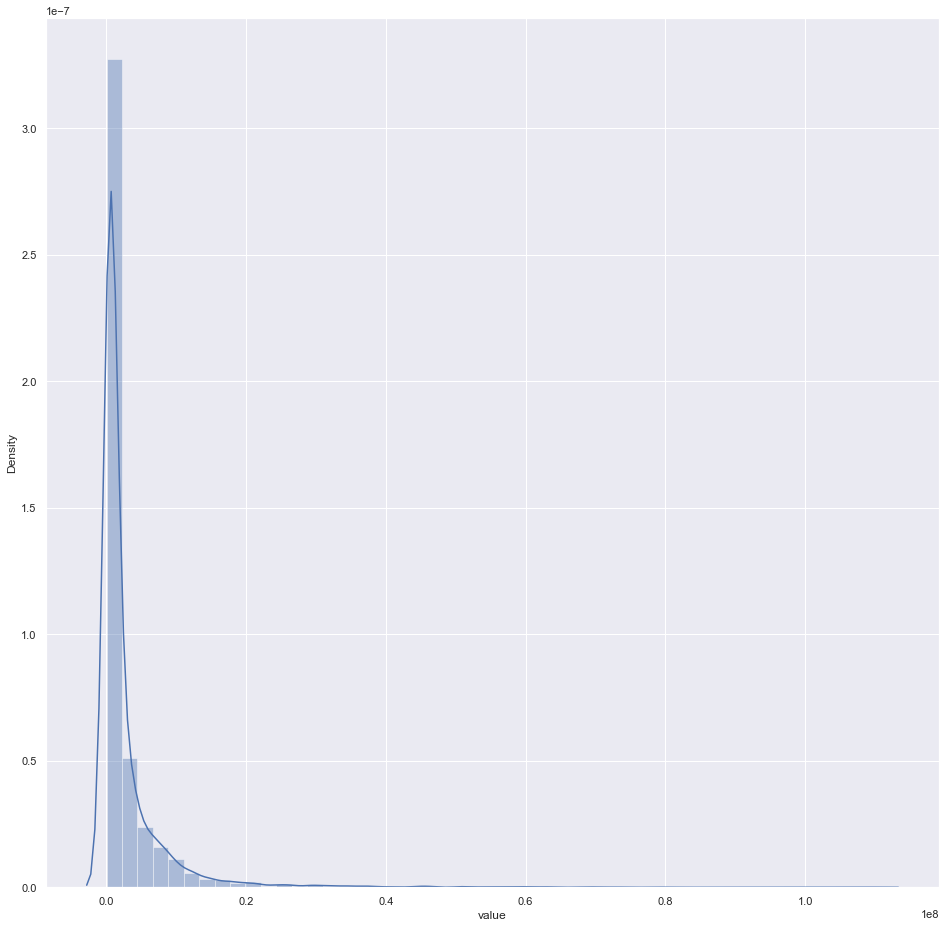

In [54]:
sns.distplot(df_train['value'])

In [55]:
df_train['value'] = np.log1p(df_train['value'])

C:\Users\choo1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='value', ylabel='Density'>

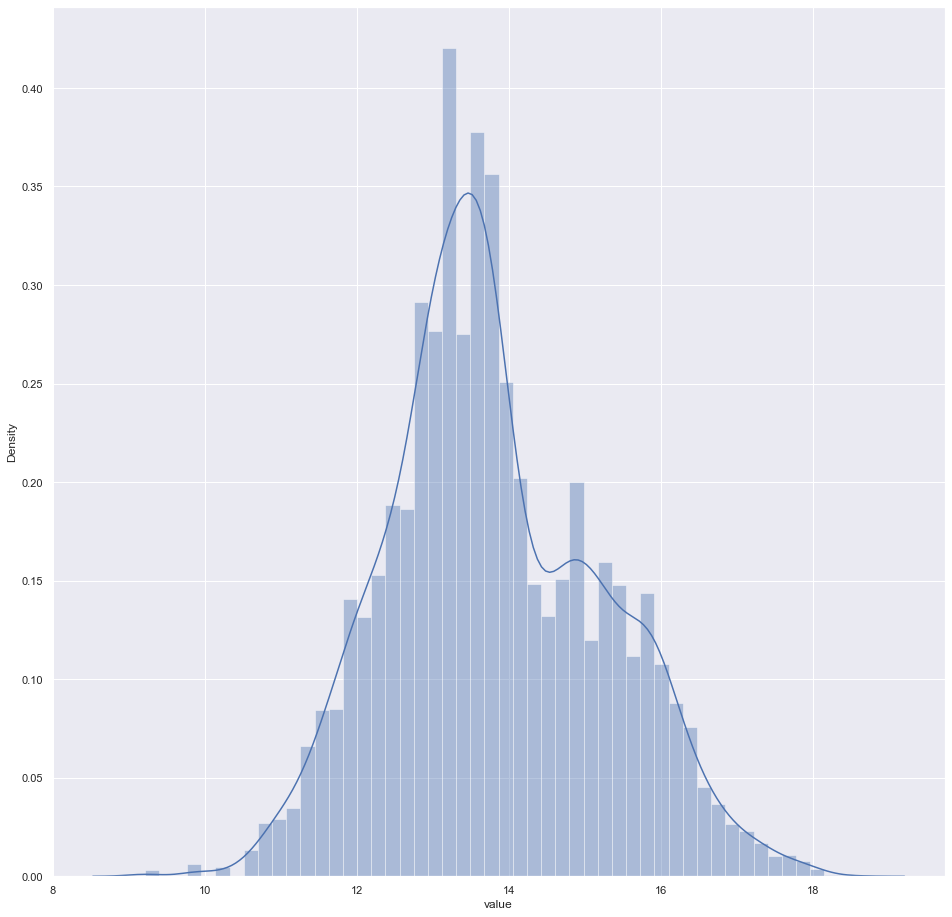

In [56]:
sns.distplot(df_train['value'])

In [57]:
df_train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,3.0,ST,left,5.0,94,94,4.0,18.520526
1,3,De Gea,27,europe,2.0,GK,right,4.0,91,93,1.0,18.092177
2,7,L. Suárez,31,south america,3.0,ST,right,5.0,91,91,3.0,18.197537
3,8,Sergio Ramos,32,europe,2.0,DF,right,4.0,91,91,3.0,17.747336
4,9,J. Oblak,25,europe,3.0,GK,right,3.0,90,93,1.0,18.035018
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,1.0,MF,right,1.0,48,63,3.0,11.002117
8928,16936,C. Ehlich,19,europe,2.0,DF,right,1.0,47,59,2.0,10.596660
8929,16941,N. Fuentes,18,south america,3.0,DF,right,1.0,47,64,2.0,10.819798
8930,16942,J. Milli,18,europe,3.0,GK,right,1.0,47,65,1.0,10.819798


### 유럽: 1 나머지: 0

In [58]:
def pickEuro(string):
    if string == "europe":
        return 1
    else:
        return 0
df_train['euro'] = df_train['continent'].apply(pickEuro)
df_test['euro'] = df_test['continent'].apply(pickEuro)
df_train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,euro
0,0,L. Messi,31,south america,3.0,ST,left,5.0,94,94,4.0,18.520526,0
1,3,De Gea,27,europe,2.0,GK,right,4.0,91,93,1.0,18.092177,1
2,7,L. Suárez,31,south america,3.0,ST,right,5.0,91,91,3.0,18.197537,0
3,8,Sergio Ramos,32,europe,2.0,DF,right,4.0,91,91,3.0,17.747336,1
4,9,J. Oblak,25,europe,3.0,GK,right,3.0,90,93,1.0,18.035018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,1.0,MF,right,1.0,48,63,3.0,11.002117,0
8928,16936,C. Ehlich,19,europe,2.0,DF,right,1.0,47,59,2.0,10.596660,1
8929,16941,N. Fuentes,18,south america,3.0,DF,right,1.0,47,64,2.0,10.819798,0
8930,16942,J. Milli,18,europe,3.0,GK,right,1.0,47,65,1.0,10.819798,1


### Categorical Data

In [59]:
df_train['continent'] = df_train['continent'].astype('category').cat.codes
df_test['continent'] = df_test['continent'].astype('category').cat.codes

df_train['position'] = df_train['position'].astype('category').cat.codes
df_test['position'] = df_test['position'].astype('category').cat.codes

df_train['prefer_foot'] = df_train['prefer_foot'].astype('category').cat.codes
df_test['prefer_foot'] = df_test['prefer_foot'].astype('category').cat.codes

In [60]:
df_train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,euro
0,0,L. Messi,31,4,3.0,3,0,5.0,94,94,4.0,18.520526,0
1,3,De Gea,27,2,2.0,1,1,4.0,91,93,1.0,18.092177,1
2,7,L. Suárez,31,4,3.0,3,1,5.0,91,91,3.0,18.197537,0
3,8,Sergio Ramos,32,2,2.0,0,1,4.0,91,91,3.0,17.747336,1
4,9,J. Oblak,25,2,3.0,1,1,3.0,90,93,1.0,18.035018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,0,1.0,2,1,1.0,48,63,3.0,11.002117,0
8928,16936,C. Ehlich,19,2,2.0,0,1,1.0,47,59,2.0,10.596660,1
8929,16941,N. Fuentes,18,4,3.0,0,1,1.0,47,64,2.0,10.819798,0
8930,16942,J. Milli,18,2,3.0,1,1,1.0,47,65,1.0,10.819798,1


### 중간 점검

In [61]:
df_pre = df_train.drop({'id', 'name'}, axis = 1)
df_pre

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,euro
0,31,4,3.0,3,0,5.0,94,94,4.0,18.520526,0
1,27,2,2.0,1,1,4.0,91,93,1.0,18.092177,1
2,31,4,3.0,3,1,5.0,91,91,3.0,18.197537,0
3,32,2,2.0,0,1,4.0,91,91,3.0,17.747336,1
4,25,2,3.0,1,1,3.0,90,93,1.0,18.035018,1
...,...,...,...,...,...,...,...,...,...,...,...
8927,18,0,1.0,2,1,1.0,48,63,3.0,11.002117,0
8928,19,2,2.0,0,1,1.0,47,59,2.0,10.596660,1
8929,18,4,3.0,0,1,1.0,47,64,2.0,10.819798,0
8930,18,2,3.0,1,1,1.0,47,65,1.0,10.819798,1


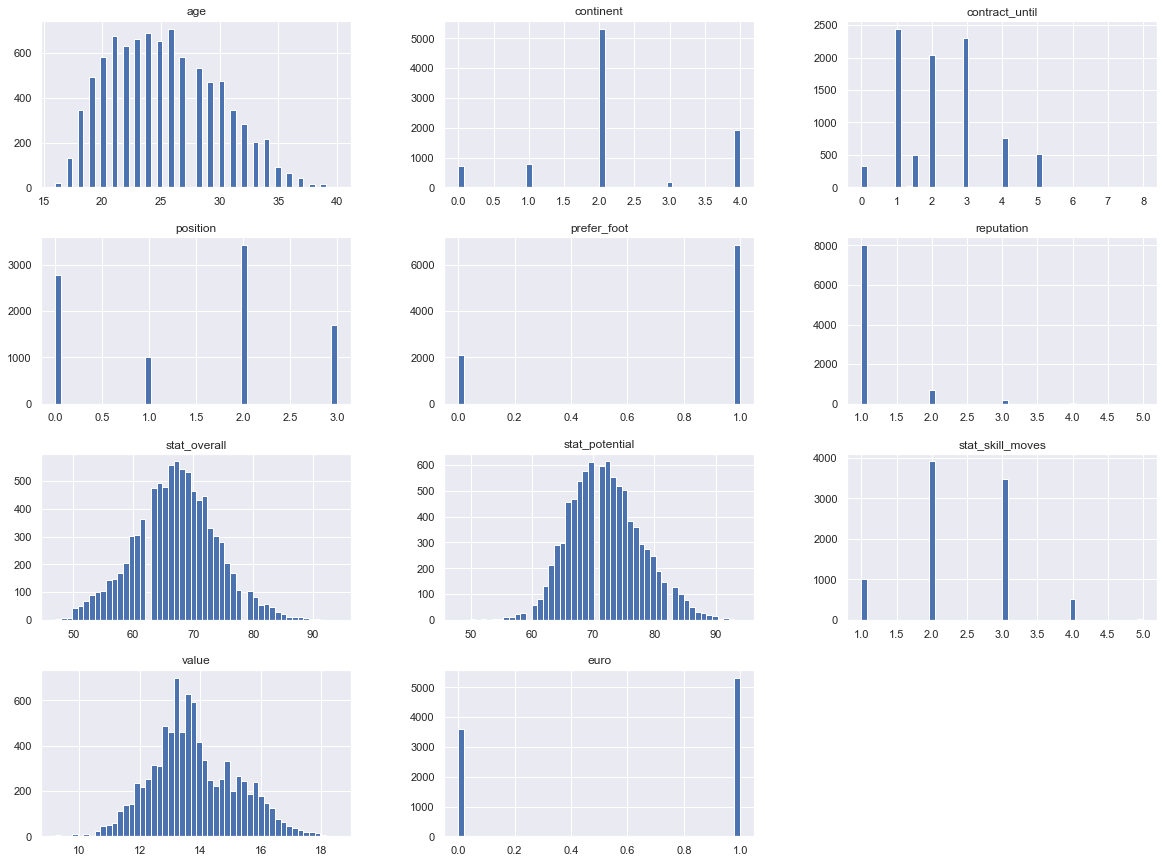

In [70]:
df_pre.hist(bins=50, figsize=(20, 15))
plt.show()

In [93]:
df_train['ageBand'] = pd.cut(df_train['age'], 5)
df_train['potential/age'] = df_train['position'] / df_train['age']
df_test['potential/age'] = df_test['position'] / df_test['age']
df_train['ageBand'] = df_train['ageBand'].astype('category').cat.codes

In [94]:
df_pre = df_train.drop({'id', 'name'}, axis = 1)

<AxesSubplot:>

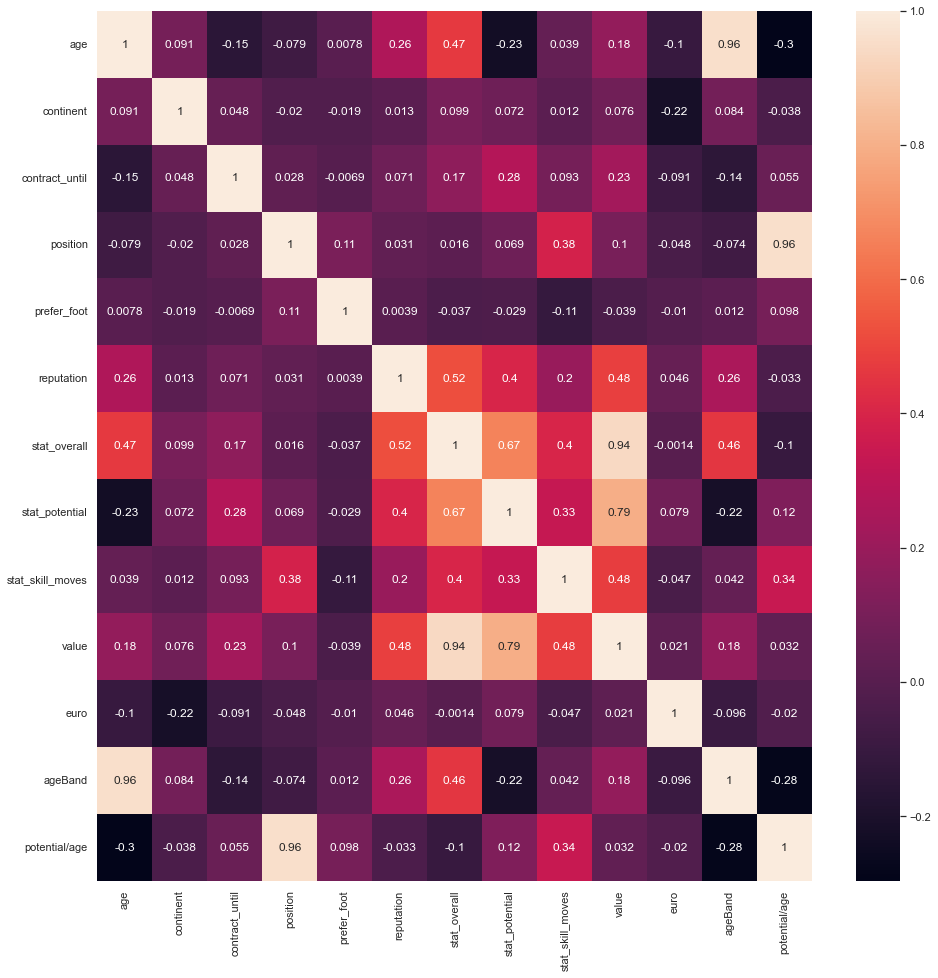

In [95]:
sns.set(rc = {'figure.figsize':(16,16)})
sns.heatmap(df_pre.corr(), annot = True)

## 기본 데이터 모델링

In [89]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization

In [96]:
df_train.columns

Index(['id', 'name', 'age', 'continent', 'contract_until', 'position',
       'prefer_foot', 'reputation', 'stat_overall', 'stat_potential',
       'stat_skill_moves', 'value', 'euro', 'ageBand', 'potential/age'],
      dtype='object')

In [97]:
feature = [
    'age', 'continent', 'contract_until', 'position', 'prefer_foot',
    'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
    'euro', 'potential/age'
]
x_train = df_train[feature]
y_train = df_train['value']
x_test = df_test[feature]

### RandomForestRegresssor & Bayesian

In [ ]:
rf_parameter_bounds = {
                      'max_depth' : (3,20),          # 범위 3~5
                      'n_estimators' : (120,500),
                      }

def rf_bo(max_depth, n_estimators):
    rf_params = {'max_depth' : int(round(max_depth)),
                 'n_estimators' : int(round(n_estimators)),      
                }
    rf = RandomForestRegressor(**rf_params)
    rf.fit(x_train, y_train)
    neg_mse_scores = cross_val_score(rf, x_train, y_train,
                                 scoring = 'neg_mean_squared_error',
                                 cv = 3)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    mean_rmse = np.mean(rmse_scores)
    return -mean_rmse

In [100]:
rf_parameter_bounds = {'n_estimators': (16, 1024), 'max_depth': (3, 10)}


def rf_opt(n_estimators, max_depth):

    rf_params = {
        'n_estimators': int(round(n_estimators)),
        'max_depth': int(round(max_depth)),
        'n_jobs': -1,
        'random_state': 777
    }

    rf = RandomForestRegressor(**rf_params)

    kf = KFold(n_splits=3, shuffle=True, random_state=50)

    score = cross_val_score(rf,
                            x_train,
                            y_train,
                            scoring='neg_mean_squared_error',
                            cv=kf,
                            n_jobs=-1)

    return np.mean(score)


BO_rf = BayesianOptimization(f=rf_opt,
                             pbounds=rf_parameter_bounds,
                             random_state=0)

In [101]:
BO_rf.maximize(init_points = 30, n_iter = 20)

|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        | -0.02061  |  6.842    |  736.9    |
|  2        | -0.02064  |  7.219    |  565.2    |
|  3        | -0.03367  |  5.966    |  667.1    |
|  4        | -0.03356  |  6.063    |  914.9    |
|  5        | -0.009861 |  9.746    |  402.5    |
|  6        | -0.01131  |  8.542    |  549.1    |
|  7        | -0.02056  |  6.976    |  949.0    |
|  8        | -0.1818   |  3.497    |  103.8    |
|  9        | -0.1831   |  3.142    |  855.3    |
|  10       | -0.01419  |  8.447    |  893.0    |
|  11       | -0.009829 |  9.85     |  821.6    |
|  12       | -0.03364  |  6.23     |  802.8    |
|  13       | -0.0998   |  3.828    |  661.0    |
|  14       | -0.0994   |  4.003    |  968.2    |
|  15       | -0.02061  |  6.653    |  434.0    |
|  16       | -0.05712  |  4.852    |  796.4    |
|  17       | -0.03368  |  6.193    |  589.0    |
|  18       | -0.1834   |  3.132    |  638.6    |


In [102]:
BO_rf.max

{'target': -0.009829294319589666,
 'params': {'max_depth': 9.850328395629347, 'n_estimators': 821.5518327304574}}

In [103]:
model_rf = RandomForestRegressor(n_estimators=821, max_depth=10)

In [106]:
pred_rf = np.expm1(model_rf.predict(x_test))
pred_rf

array([5.49643252e+07, 7.84797700e+07, 6.71966173e+07, ...,
       5.94766615e+04, 5.20223520e+04, 5.15877823e+04])

## 외부데이터

In [3]:
df_stats = pd.read_csv("./fifa_stats_1.csv")
df_stats

,Unnamed: 0,playerName,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,0,Lionel Messi,96.5,22.333333,74.500000,84.000000,80.428571,85.250,10.8
1,1,Cristiano Ronaldo,92.0,25.333333,77.166667,81.666667,85.571429,87.250,11.6
2,2,Neymar,95.5,26.000000,74.166667,77.333333,79.142857,79.750,11.8
3,3,Luis Suárez,88.5,37.666667,80.333333,74.666667,81.428571,85.875,30.6
4,4,Manuel Neuer,39.0,10.333333,49.333333,43.000000,57.857143,20.250,91.2
...,...,...,...,...,...,...,...,...,...
14146,14146,Junes Barny,62.5,48.666667,57.166667,59.333333,63.000000,53.625,12.0
14147,14147,Courtney Senior,64.0,27.333333,46.333333,53.666667,71.857143,49.500,12.2
14148,14148,Mauro Laínez,61.0,57.000000,58.333333,61.333333,63.000000,50.375,9.0
14149,14149,Facundo Barboza,63.5,22.000000,48.166667,58.666667,69.714286,43.000,11.2


In [4]:
df_stats = df_stats.drop('Unnamed: 0', axis=1)
df_stats

,playerName,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,Lionel Messi,96.5,22.333333,74.500000,84.000000,80.428571,85.250,10.8
1,Cristiano Ronaldo,92.0,25.333333,77.166667,81.666667,85.571429,87.250,11.6
2,Neymar,95.5,26.000000,74.166667,77.333333,79.142857,79.750,11.8
3,Luis Suárez,88.5,37.666667,80.333333,74.666667,81.428571,85.875,30.6
4,Manuel Neuer,39.0,10.333333,49.333333,43.000000,57.857143,20.250,91.2
...,...,...,...,...,...,...,...,...
14146,Junes Barny,62.5,48.666667,57.166667,59.333333,63.000000,53.625,12.0
14147,Courtney Senior,64.0,27.333333,46.333333,53.666667,71.857143,49.500,12.2
14148,Mauro Laínez,61.0,57.000000,58.333333,61.333333,63.000000,50.375,9.0
14149,Facundo Barboza,63.5,22.000000,48.166667,58.666667,69.714286,43.000,11.2


In [6]:
df_stats.rename(columns={'playerName':'name'}, inplace=True)
df_stats

,name,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,Lionel Messi,96.5,22.333333,74.500000,84.000000,80.428571,85.250,10.8
1,Cristiano Ronaldo,92.0,25.333333,77.166667,81.666667,85.571429,87.250,11.6
2,Neymar,95.5,26.000000,74.166667,77.333333,79.142857,79.750,11.8
3,Luis Suárez,88.5,37.666667,80.333333,74.666667,81.428571,85.875,30.6
4,Manuel Neuer,39.0,10.333333,49.333333,43.000000,57.857143,20.250,91.2
...,...,...,...,...,...,...,...,...
14146,Junes Barny,62.5,48.666667,57.166667,59.333333,63.000000,53.625,12.0
14147,Courtney Senior,64.0,27.333333,46.333333,53.666667,71.857143,49.500,12.2
14148,Mauro Laínez,61.0,57.000000,58.333333,61.333333,63.000000,50.375,9.0
14149,Facundo Barboza,63.5,22.000000,48.166667,58.666667,69.714286,43.000,11.2


In [9]:
def nameConvert(in_name):
    try:
        first, last = in_name.split()
        return last
    except:
        return in_name

In [10]:
df_train['name'] = df_train['name'].apply(nameConvert)
df_train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [11]:
df_stats['name'] = df_stats['name'].apply(nameConvert)
df_stats

,name,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,Messi,96.5,22.333333,74.500000,84.000000,80.428571,85.250,10.8
1,Ronaldo,92.0,25.333333,77.166667,81.666667,85.571429,87.250,11.6
2,Neymar,95.5,26.000000,74.166667,77.333333,79.142857,79.750,11.8
3,Suárez,88.5,37.666667,80.333333,74.666667,81.428571,85.875,30.6
4,Neuer,39.0,10.333333,49.333333,43.000000,57.857143,20.250,91.2
...,...,...,...,...,...,...,...,...
14146,Barny,62.5,48.666667,57.166667,59.333333,63.000000,53.625,12.0
14147,Senior,64.0,27.333333,46.333333,53.666667,71.857143,49.500,12.2
14148,Laínez,61.0,57.000000,58.333333,61.333333,63.000000,50.375,9.0
14149,Barboza,63.5,22.000000,48.166667,58.666667,69.714286,43.000,11.2


In [23]:
set(df_train['name'].unique()) - set(df_stats['name'].unique())

{'Klarer',
 'Pelaitay',
 'Mølgaard',
 'A. Al Salem',
 'Deiman',
 'Laiton',
 'Meras',
 'Ndenbe',
 'Stokkers',
 'Parada',
 'Mannek',
 'Bellvís',
 'N. Sonko Sundberg',
 'Bock',
 'A. Al Zaqan',
 'Hellquist',
 'A. Al Asmari',
 'Ramalingom',
 'Corbo',
 'I. De Santis',
 'Ingolotti',
 'Özgenç',
 'Gasbarro',
 'Supriaga',
 'Fantacci',
 'Finochietto',
 'Romaña',
 'Heča',
 'S. Al Sawadi',
 'Goitia',
 'Möller',
 'Naamani',
 'Toma',
 'Uehara',
 'Aasmundsen',
 'Vokic',
 'Ndam',
 'Romboli',
 'J. von Haacke',
 'Groundstroem',
 'Puster',
 'Malcı',
 'N. van den Dam',
 'Kastenhofer',
 'Ikedi',
 'M. Al Shudukhi',
 'Magnetti',
 'Gyökeres',
 'Jäntti',
 'Breistøl',
 'Linthorst',
 'Janvier',
 'Harloff',
 'Boevink',
 'Kowalczyk',
 'Iversen',
 'Aseri',
 'Rasswalder',
 'Kühn',
 'Høgh',
 'Conze',
 'Bråtveit',
 'Mainka',
 'Musaba',
 'Crona',
 'Verbong',
 'Campaz',
 'Hsissane',
 'Bellomo',
 'Blackwood',
 'Buenacasa',
 'Ünlüçifçi',
 'Zanette',
 'Ampomah',
 'T. van den Belt',
 'Pipa',
 'Philippe',
 'M. Bustgaard Larse

In [16]:
merge_df = pd.merge(df_train, df_stats, on='name', how='left')
merge_df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,0,Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,96.5,22.333333,74.500000,84.000000,80.428571,85.250,10.8
1,3,Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,30.0,15.666667,50.333333,39.333333,55.571429,21.250,88.6
2,7,Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,88.5,37.666667,80.333333,74.666667,81.428571,85.875,30.6
3,7,Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,84.5,47.000000,69.833333,80.000000,72.000000,69.250,9.6
4,7,Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,63.5,72.666667,65.833333,69.666667,79.142857,65.250,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20850,16941,Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0,67.5,71.333333,66.833333,69.666667,72.428571,61.500,8.8
20851,16941,Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0,61.0,66.000000,62.500000,64.333333,72.857143,51.250,10.6
20852,16941,Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0,61.5,43.333333,65.333333,65.000000,69.857143,54.875,9.4
20853,16942,Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
merge_df = merge_df.drop_duplicates(['name'], keep = 'first')
merge_df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,ballSkill,defence,mental,passing,physical,shooting,goalkeeper
0,0,Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,96.5,22.333333,74.500000,84.000000,80.428571,85.250,10.8
1,3,Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,30.0,15.666667,50.333333,39.333333,55.571429,21.250,88.6
2,7,Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,88.5,37.666667,80.333333,74.666667,81.428571,85.875,30.6
12,8,Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,72.5,88.333333,75.666667,72.000000,78.428571,69.875,9.2
23,9,Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,14.0,14.666667,43.166667,22.666667,59.142857,13.875,85.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20845,16922,Uchimura,33,asia,2021,MF,right,1.0,48,48,2.0,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20846,16925,Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20847,16936,Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20853,16942,Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,16))

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<AxesSubplot:>

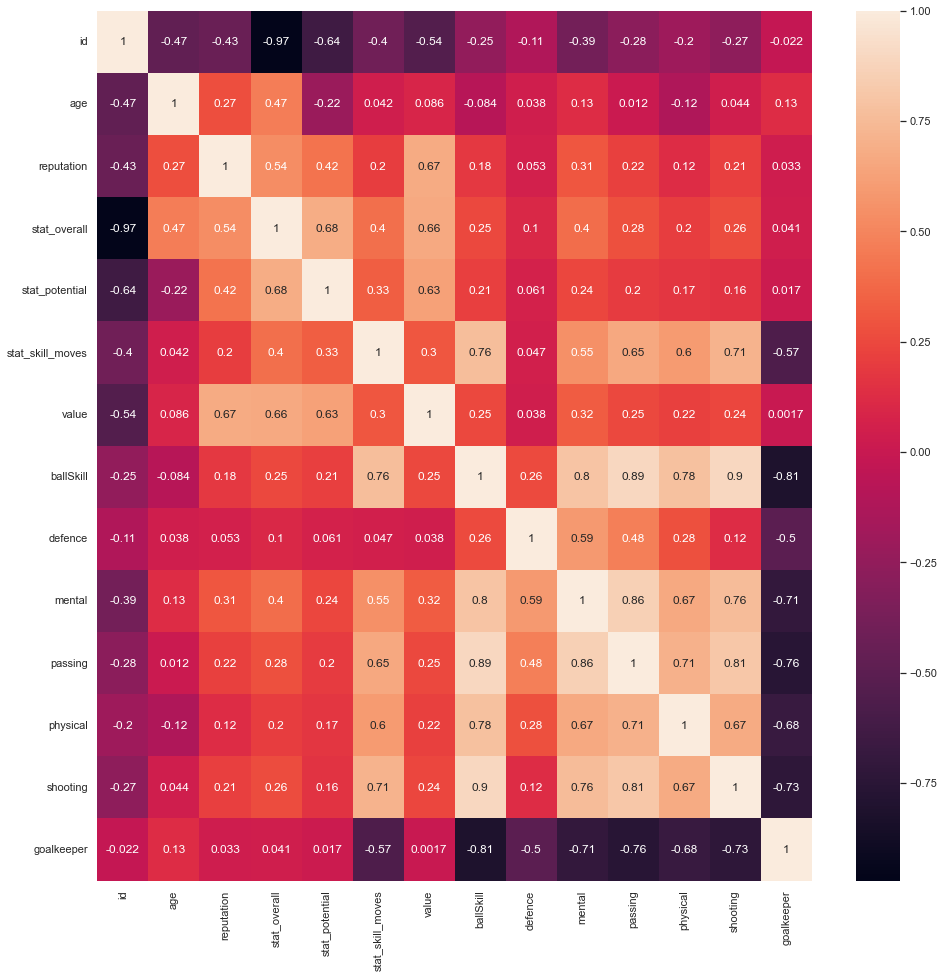

In [32]:
sns.set(rc = {'figure.figsize':(16,16)})
sns.heatmap(merge_df.corr(), annot = True)